In [1]:
import numpy as np
import os as os
import matplotlib.pyplot as plt

from PIL import Image as image


img_size = 100
data_dir = 'data/2'
filenames = [data_file.split('.')[0] for data_file in os.listdir(f'{data_dir}/image')]

X = np.asarray([
    np.asarray(
        image.open(f'{data_dir}/image/{filename}.jpg')
            .resize((img_size, img_size), image.ANTIALIAS),
        dtype=np.uint8
    )
    for filename in filenames
])

Y = np.asarray([
    np.asarray(
        image.open(f'{data_dir}/ground-truth/{filename}.png')
            .resize((img_size, img_size), image.ANTIALIAS),
        dtype=np.uint8
    )
    for filename in filenames
])

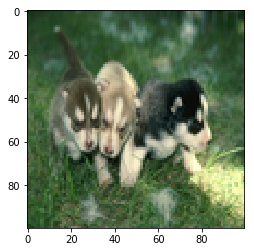

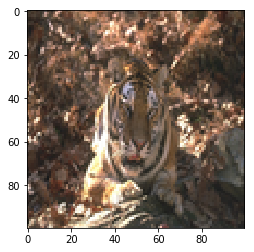

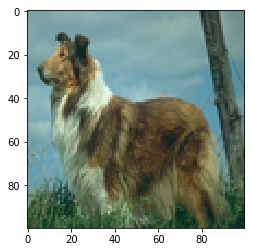

In [2]:
for x in X[:3]:
    plt.figure()
    plt.imshow(x)

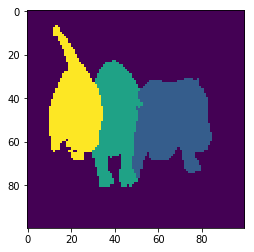

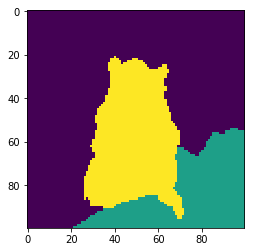

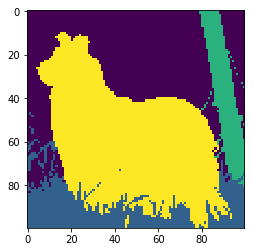

In [3]:
for x in Y[:3]:
    plt.figure()
    plt.imshow(x)

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Conv2DTranspose, UpSampling2D, BatchNormalization

X_train, Y_train = X / 255., Y / 255.


model = Sequential()
#ENCODER PART
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=X.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#DECODER PART
model.add(UpSampling2D((2, 2)))
model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(1, (3, 3), strides=(2,2), activation='sigmoid', padding='same')) #pixel-wise classification
model.summary()
model.compile(loss='binary_crossentropy',optimizer='rmsprop')
h = model.fit(X_train, Y_train[:,:,:,None], epochs=100, batch_size=10, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 25, 25, 128)       73856     
__________

Epoch 63/100
80/80 [==============================] - 3s 37ms/step - loss: 0.4781 - val_loss: 0.5136
Epoch 64/100
80/80 [==============================] - 3s 37ms/step - loss: 0.4748 - val_loss: 0.5179
Epoch 65/100
80/80 [==============================] - 3s 37ms/step - loss: 0.4634 - val_loss: 0.5787
Epoch 66/100
80/80 [==============================] - 3s 38ms/step - loss: 0.4688 - val_loss: 0.5149
Epoch 67/100
80/80 [==============================] - 3s 38ms/step - loss: 0.4588 - val_loss: 0.5148
Epoch 68/100
80/80 [==============================] - 3s 38ms/step - loss: 0.4559 - val_loss: 0.5262
Epoch 69/100
80/80 [==============================] - 3s 37ms/step - loss: 0.4556 - val_loss: 0.5071
Epoch 70/100
80/80 [==============================] - 3s 37ms/step - loss: 0.4782 - val_loss: 0.5577
Epoch 71/100
80/80 [==============================] - 3s 37ms/step - loss: 0.4692 - val_loss: 0.5147
Epoch 72/100
80/80 [==============================] - 3s 37ms/step - loss: 0.4587 - val_los